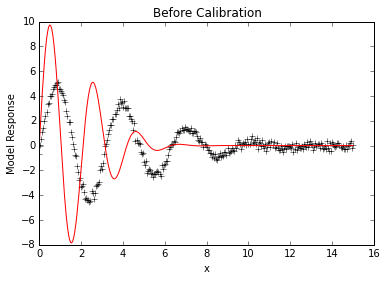

In [19]:
# %load calibrate_sine_lmfit.py
%matplotlib inline
# Calibration example modified from lmfit webpage
# (http://cars9.uchicago.edu/software/python/lmfit/parameters.html)
import sys,os
try:
    import matk
except:
    try:
        sys.path.append(os.path.join('..','src'))
        import matk
    except ImportError as err:
        print 'Unable to load MATK module: '+str(err)
import numpy as np
from matplotlib import pyplot as plt

# define objective function: returns the array to be minimized
def sine_decay(params, x, data):
    """ model decaying sine wave, subtract data"""
    amp = params['amp']
    shift = params['shift']
    omega = params['omega']
    decay = params['decay']

    model = amp * np.sin(x * omega + shift) * np.exp(-x*x*decay)

    obsnames = ['obs'+str(i) for i in range(1,len(data)+1)]
    return dict(zip(obsnames,model))


# create data to be fitted
x = np.linspace(0, 15, 301)
np.random.seed(1000)
data = (5. * np.sin(2 * x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=len(x), scale=0.2) )

# Create MATK object
p = matk.matk(model=sine_decay, model_args=(x,data,))

# Create parameters
p.add_par('amp', value=10, min=0.)
p.add_par('decay', value=0.1)
p.add_par('shift', value=0.0, min=-np.pi/2., max=np.pi/2.)
p.add_par('omega', value=3.0)

# Create observation names and set observation values
for i in range(len(data)):
    p.add_obs('obs'+str(i+1), value=data[i])

# Look at initial fit
p.forward()
#f, (ax1,ax2) = plt.subplots(2,sharex=True)
plt.plot(x,data, 'k+')
plt.plot(x,p.simvalues, 'r')
plt.ylabel("Model Response")
plt.xlabel("x")
plt.title("Before Calibration")
plt.show()

In [22]:
# Calibrate parameters to data, results are printed to screen
print "Calibration results:"
lm = p.lmfit(cpus=2)

Calibration results:
[[Variables]]
     amp:       5.011399 +/- 0.040469 (0.81%) initial =  5.011398
     decay:     0.024835 +/- 0.000465 (1.87%) initial =  0.024835
     omega:     1.999116 +/- 0.003345 (0.17%) initial =  1.999116
     shift:    -0.106184 +/- 0.016466 (15.51%) initial = -0.106207
[[Correlations]] (unreported correlations are <  0.100)
    C(omega, shift)              = -0.785 
    C(amp, decay)                =  0.584 
    C(amp, shift)                = -0.117 
None
SSR:  12.8161378922


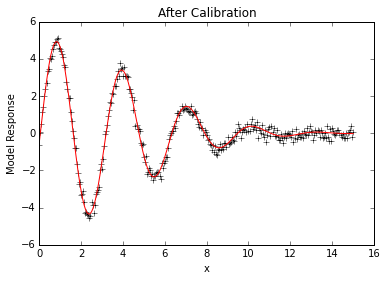

In [21]:
# Look at calibrated fit
plt.plot(x,data, 'k+')
plt.plot(x,p.simvalues, 'r')
plt.ylabel("Model Response")
plt.xlabel("x")
plt.title("After Calibration")
plt.show()